<a href="https://colab.research.google.com/github/selaaulia/PCVK_Genap_2022/blob/main/Week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import math
from PIL import Image as im

In [9]:
# Melakukan konvolusi tanpa library
def convolution2d(image, kernel, stride, padding): # Stride adalah besarnya pergeseran setiap perhitungan konvolusi
  image = np.pad(image, padding, mode='constant', constant_values=0) # np.pad digunakan untuk memodifikasi isi array menjadi 4 parameter dengan menambah satu layer di setiap sisi terluar citra input array
                                                                     # contants_values digunakan untuk mengisi setiap value pada layer yang telah ditambahkan
  h_kernel, w_kernel = kernel.shape #mengambil tinggi dan lebar dari kernel
  h_padded, w_padded = image.shape #mengambil tinggi dan lebar dari image

  print(kernel)

  print('----------')

  print(image)

  output_height = (h_padded - h_kernel) // stride + 1 # menghitung output perhitungan dari tinggi
  output_width = (w_padded - w_kernel) // stride + 1 # mrnghitung output perhitungan dari lebar

  new_image = np.zeros((output_height, output_width)).astype(np.float32) #array kosong dengan jumlah sesuai dengan hasil output height dan width (isinya masih kosong)

  for y in range(0, output_height): #melakukan looping perhitungan pada tinggi 
    for x in range(0, output_width):
      new_image[y][x] = np.sum(image[y * stride:y * stride + h_kernel, x * stride:x * stride + w_kernel] * kernel).astype(np.float32) # menghitung menggunakan rumus perkalian jumlah pixel dan kernel
  
  print('----------')
  print(new_image)
  cv2_imshow(new_image)

In [10]:
img_original = cv.imread('/content/drive/MyDrive/POLINEMA/Semester_6/PCVK/Pertemuan_3/mandrill.tiff') # Melakukan pengambilan gambar pada drive
img_1 = cv.resize(img_original, (0,0), fx=0.5, fy=0.5) # Melakukan resize pada gambar yang telah diambil 
img_gray = cv.cvtColor(img_1, cv.COLOR_BGR2GRAY) # Mengkonversi gambar dari BGR ke GRAY

[[ 0 -1  0]
 [-1  4 -1]
 [ 0 -1  0]]
----------
[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0 105 ... 151   0   0]
 ...
 [  0   0  80 ...  39   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
----------
[[   0. -105.  -61. ... -124. -151.    0.]
 [-105.  260.  -13. ...  164.  402. -151.]
 [ -99.  141. -114. ...    3.  -60.  -78.]
 ...
 [-133.  202.  101. ...   47.  129.  -86.]
 [ -80.  117.   -7. ...   -2.   27.  -39.]
 [   0.  -80.  -70. ...  -43.  -39.    0.]]


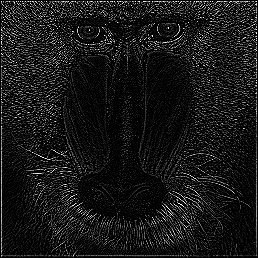

In [11]:
# image sharpen
kernel_sharpen = np.array([[0,-1,0],
                           [-1,4,-1],
                           [0,-1,0]])
convolution2d(img_gray, kernel_sharpen, 1, 2)

[[-2 -1  0]
 [-1  1  1]
 [ 0  1  2]]
----------
[[105  61  93 ...  85 124 151]
 [ 99  59  90 ... 113  96  78]
 [ 91 100  83 ...  99  66 125]
 ...
 [106 142 139 ... 101  91  86]
 [133 144 130 ...  93  90  86]
 [ 80  70  63 ...  45  43  39]]
----------
[[ 45.  59.  44. ...  79.  28.  83.]
 [165.  38.  98. ...  73. 119. 231.]
 [225. -12. 107. ...  18.  62. 310.]
 ...
 [180. 123.  98. ...  98.  72.  44.]
 [200.  83.  67. ...  86.  75.  37.]
 [-17. -99. -35. ...  -4. -39. -89.]]


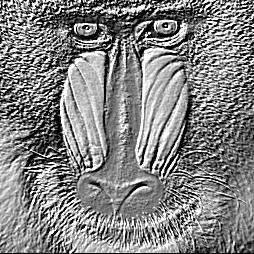

In [12]:
# image emboss
kernel_emboss = np.array([[-2,-1,0],
                          [-1,1,1],
                          [0,1,2]])

convolution2d(img_gray, kernel_emboss, 1, 0)

[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]
----------
[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0 105 ... 151   0   0]
 ...
 [  0   0  80 ...  39   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
----------
[[-105.  -61.   12. ...  -66.  124.  151.]
 [-309. -181.   33. ...  -97.  344.  380.]
 [-394. -279.   38. ...  -22.  382.  432.]
 ...
 [-452. -500.  -10. ...   35.  314.  297.]
 [-293. -284.   37. ...   19.  176.  164.]
 [ -80.  -70.   17. ...    6.   43.   39.]]


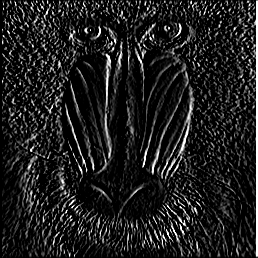

In [13]:
# image left sobel edge detection
kernel_sobel = np.array([[1,0,-1],
                         [2,0,-2],
                         [1,0,-1]])

convolution2d(img_gray, kernel_sobel, 1, 2)

[[-1 -1 -1]
 [-1  8 -1]
 [-1 -1 -1]]
----------
[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0 105 ... 151   0   0]
 ...
 [  0   0  80 ...  39   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
----------
[[-105. -166. -259. ... -360. -275. -151.]
 [-204.  621.   42. ...  469.  910. -229.]
 [-295.  376. -250. ...  -73.   62. -354.]
 ...
 [-319.  522.  289. ...  136.  339. -211.]
 [-213.  293.   10. ...   -9.   93. -125.]
 [ -80. -150. -213. ... -127.  -82.  -39.]]


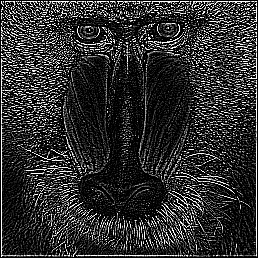

In [14]:
# image canny edge detection
kernel_canny = np.array([[-1,-1,-1],
                         [-1,8,-1],
                         [-1,-1,-1]])

convolution2d(img_gray, kernel_canny, 1, 2)

[[6.76977605e-05 1.06424313e-04 1.59524251e-04 2.27998446e-04
  3.10710815e-04 4.03738498e-04 5.00222550e-04 5.90943118e-04
  6.65652249e-04 7.14938094e-04 7.32164694e-04 7.14938094e-04
  6.65652249e-04 5.90943118e-04 5.00222550e-04 4.03738498e-04
  3.10710815e-04 2.27998446e-04 1.59524251e-04 1.06424313e-04
  6.76977605e-05]
 [1.06424313e-04 1.67304416e-04 2.50780213e-04 3.58425119e-04
  4.88453157e-04 6.34697392e-04 7.86375215e-04 9.28992549e-04
  1.04643909e-03 1.12391894e-03 1.15100003e-03 1.12391894e-03
  1.04643909e-03 9.28992549e-04 7.86375215e-04 6.34697392e-04
  4.88453157e-04 3.58425119e-04 2.50780213e-04 1.67304416e-04
  1.06424313e-04]
 [1.59524251e-04 2.50780213e-04 3.75905888e-04 5.37259743e-04
  7.32164694e-04 9.51376842e-04 1.17873364e-03 1.39250926e-03
  1.56855524e-03 1.68469331e-03 1.72528639e-03 1.68469331e-03
  1.56855524e-03 1.39250926e-03 1.17873364e-03 9.51376842e-04
  7.32164694e-04 5.37259743e-04 3.75905888e-04 2.50780213e-04
  1.59524251e-04]
 [2.27998446e-04

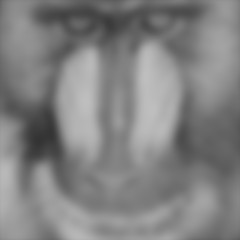

In [15]:
# image 21x21 gaussian blur
kernel_size = 21
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()

convolution2d(img_gray, gauss_kernel, 1, 2)